# Homework #2 (due 10th of November, 11:59 PM):


### Part 1)
- Load the breast cancer dataset using datasets.load_breast_cancer()
- Use scatter plots to look at the data. You can select two features for x and y axes at a time and color the samples according to their classes. You are not expected to try all pairs, which would be too many. But please show a few examples. 
- Also use box plots to look at the data. Please show that you are able to examine some features (not all them are necessary).
- Create a training and test set (with shuffling).
- Train a **decision tree classifier** using the training set.
- What are the top 5 most important (discriminative) features?
- Train a **logistic regression model** using the training set.
- Which model (DT or LR) performed better on the test set? Note: You can use score() method of built-in classifiers to compare.


In [ ]:
#Importing needed libraries
import pandas as pd
import numpy as np
from sklearn import datasets
from matplotlib import pyplot
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn import tree as tr
from google.colab import files
import io

In [ ]:
#Load the breast cancer dataset using datasets.load_breast_cancer()
#Loading cancer dataset
data = datasets.load_breast_cancer()

#Below code line assigns all data and the results of Breast Cancer Dataset to 'cancer_df'
cancer_df = pd.DataFrame(data=np.c_[data['data'], data['target']],columns= list(data['feature_names']) + ['target'])


In [ ]:
print(data['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [ ]:
#Information about first five rows Breast Cancer Dataset
cancer_df.head()

In [ ]:
#Information about last five rows Breast Cancer Dataset
cancer_df.tail()

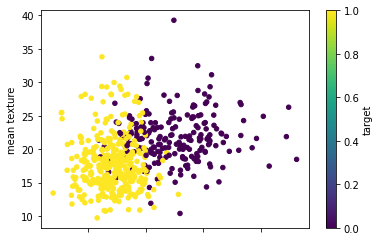

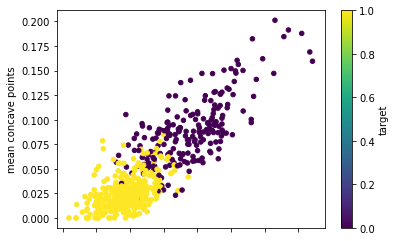

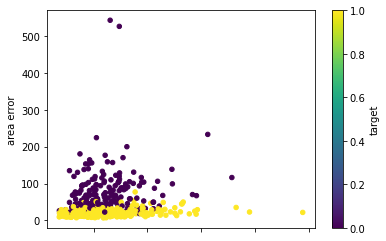

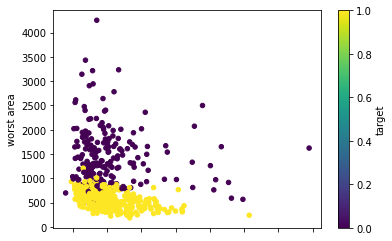

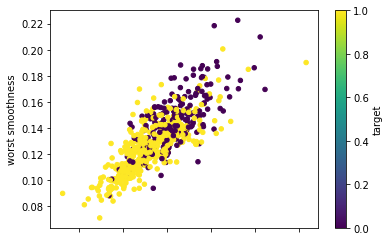

In [ ]:
#Using scatter plots to look data
cancer_df.plot.scatter(x='mean radius',y='mean texture',s=20,c='target',colormap='viridis')
cancer_df.plot.scatter(x='mean perimeter',y='mean concave points',s=20,c='target',colormap='viridis')
cancer_df.plot.scatter(x='texture error',y='area error',s=20,c='target',colormap='viridis')
cancer_df.plot.scatter(x='symmetry error',y='worst area',s=20,c='target',colormap='viridis')
cancer_df.plot.scatter(x='mean smoothness',y='worst smoothness',s=20,c='target',colormap='viridis')

In [ ]:
#cancer_df.describe().T

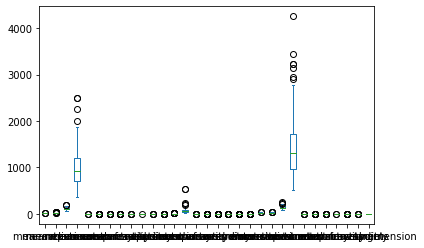

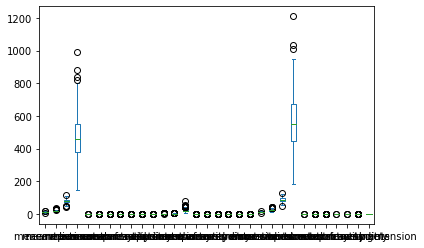

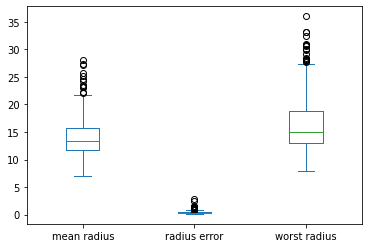

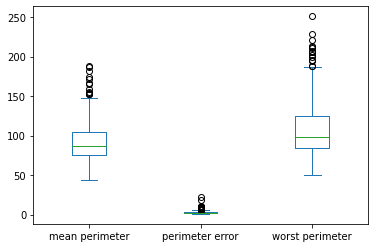

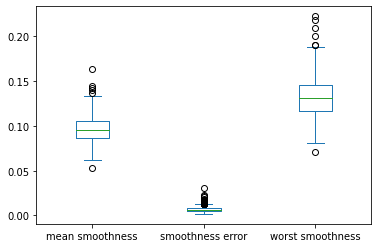

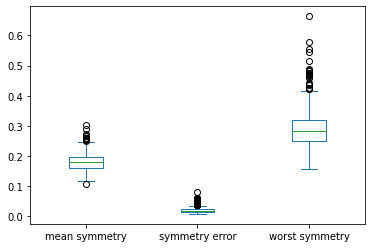

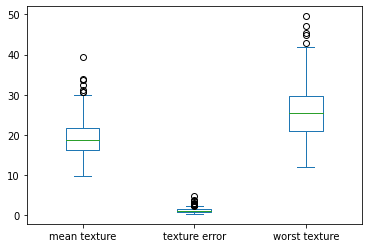

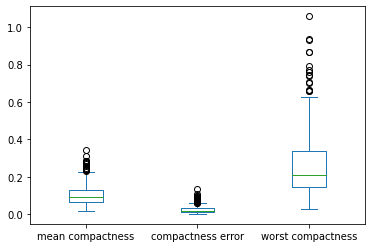

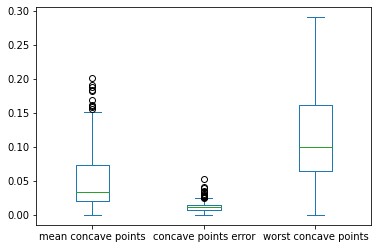

In [ ]:
#Plot Box
cancer_df[cancer_df['target']==0].plot.box()
cancer_df[cancer_df['target']==1].plot.box()   
cancer_df[['mean radius', 'radius error','worst radius']].plot.box()
cancer_df[['mean perimeter','perimeter error', 'worst perimeter']].plot.box() 
cancer_df[['mean smoothness','smoothness error','worst smoothness']].plot.box() 
cancer_df[['mean symmetry', 'symmetry error', 'worst symmetry']].plot.box() 
cancer_df[['mean texture', 'texture error','worst texture']].plot.box()
cancer_df[['mean compactness', 'compactness error','worst compactness']].plot.box()
cancer_df[['mean concave points', 'concave points error','worst concave points']].plot.box()  

In [ ]:
#Creating a training and test set (with shuffling).
train_df, test_df = train_test_split(cancer_df)
print("Train: " + str(len(train_df)))
print("Test: " + str(len(test_df)))

Train: 426
Test: 143


In [ ]:
#Creating Decision Tree Classifier 
tree = DecisionTreeClassifier(max_depth=10)
tree.fit(train_df.drop('target', axis=1), train_df['target'])
print("Tree Score: " + str(tree.score(test_df.drop('target',axis=1), test_df['target'])))

Tree Score: 0.951048951048951


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  FutureWarning,


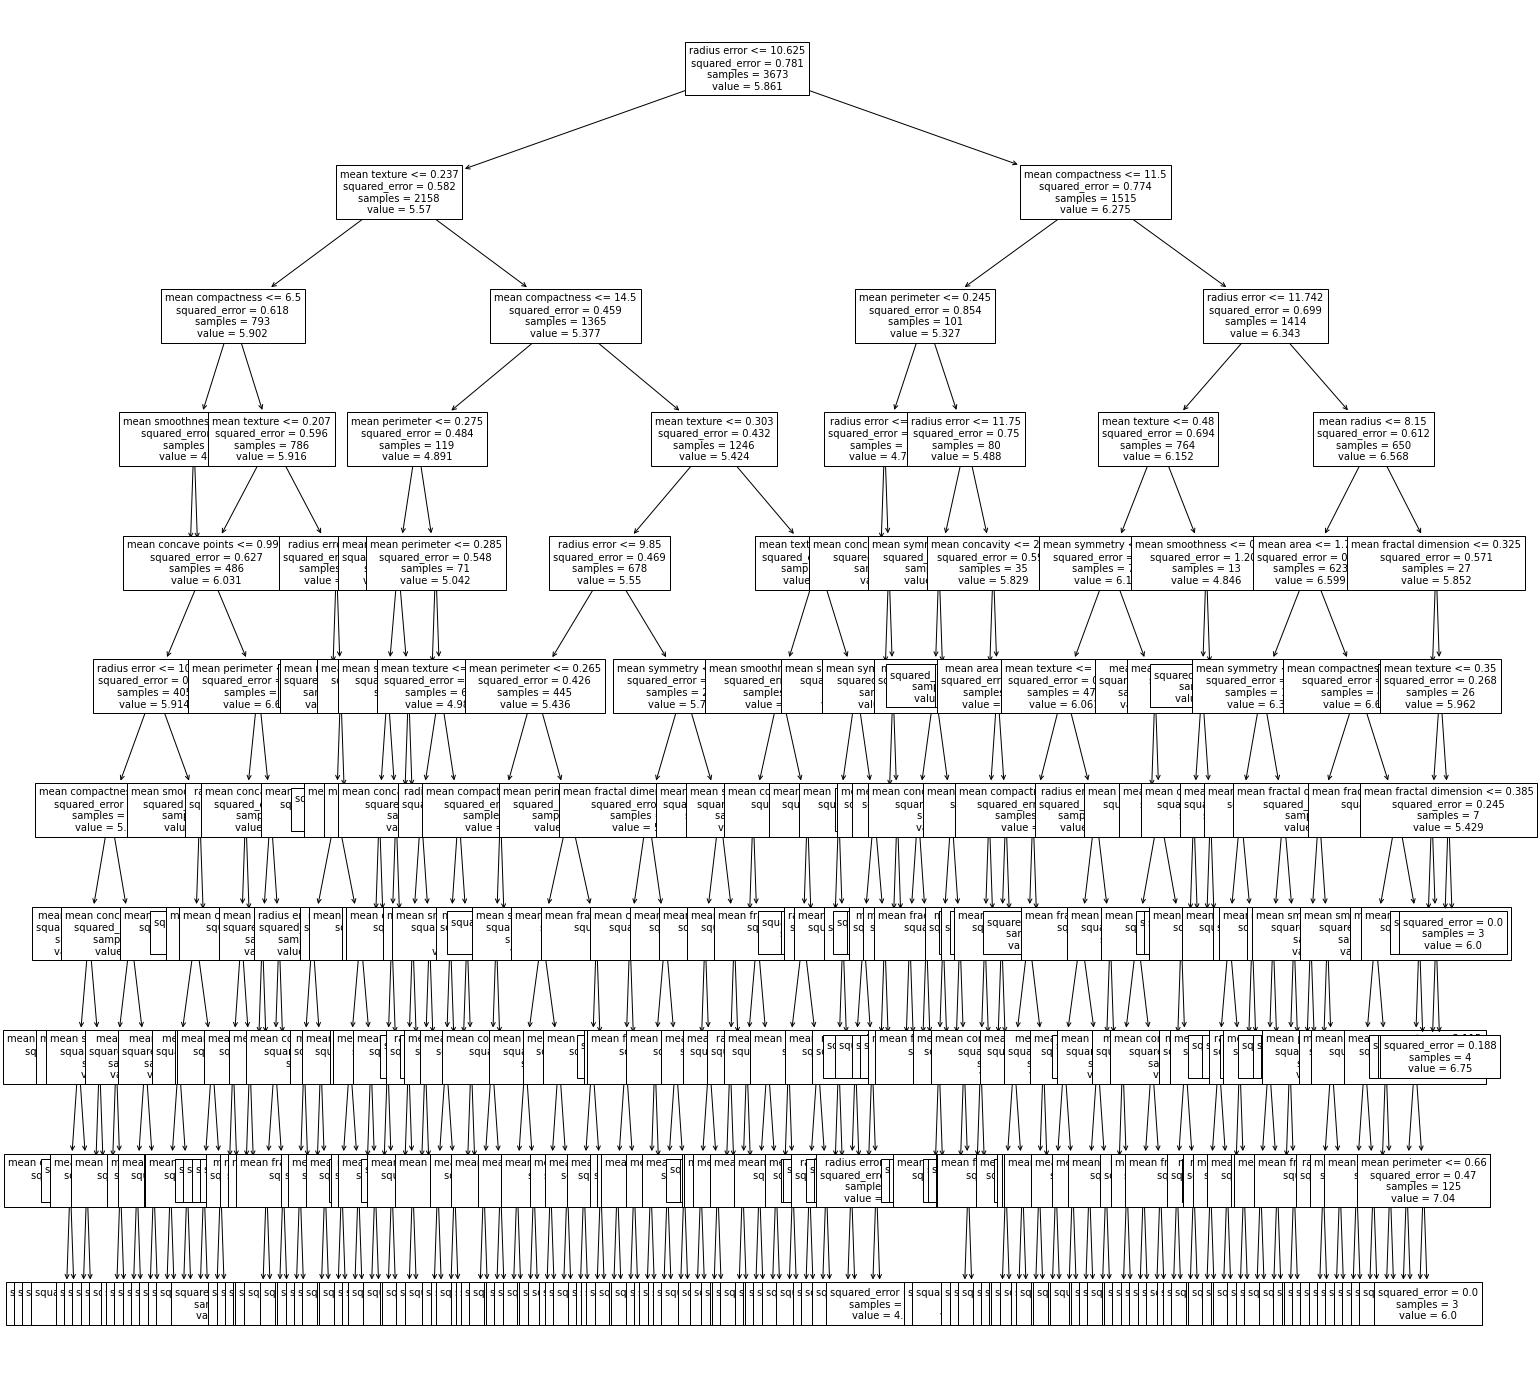

In [ ]:
#Plotting Tree
pyplot.figure(figsize=(25,25))
tr.plot_tree(tree, feature_names=data['feature_names'], fontsize=10)
pyplot.show()

In [ ]:
#Trees' Feature Importance Array
#It corresponds to featur array with respect to the indexes
print(tree.feature_importances_)

#Five most important features of breast cancer dataset
print(cancer_df.columns[1], tree.feature_importances_[1])
print(cancer_df.columns[6], tree.feature_importances_[6])
print(cancer_df.columns[21], tree.feature_importances_[21])
print(cancer_df.columns[23], tree.feature_importances_[23])
print(cancer_df.columns[27], tree.feature_importances_[27])


[0.         0.02732083 0.         0.         0.         0.00853776
 0.02136256 0.         0.00853776 0.         0.         0.
 0.00445611 0.00395482 0.0013002  0.         0.         0.
 0.00885397 0.         0.         0.0552461  0.         0.69931793
 0.00498036 0.         0.         0.13416399 0.         0.02196761]
mean texture 0.027320827320827322
mean concavity 0.021362561788093728
worst texture 0.05524610095616861
worst area 0.699317927313448
worst concave points 0.13416398924500675


In [ ]:
#Logistic Regression
lr_orig = LogisticRegression(C=0.01, max_iter=1000)
lr_orig.fit(train_df.drop(['target'], axis=1),train_df['target'])
lr_orig.score(test_df.drop(['target'], axis=1), test_df['target'])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  FutureWarning,


0.9440559440559441

In [ ]:
#Showing score with another way
print(sum(lr_orig.predict(train_df.drop('target', axis=1))==train_df['target']), "/",len(train_df['target']))
print(sum(lr_orig.predict(test_df.drop('target', axis=1))==test_df['target']), "/",len(test_df['target']))

403 / 426
135 / 143


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  FutureWarning,


In [ ]:
#Comparing Decision Tree Classifier vs Logistic Regression
print("Decision Tree Classifier Score: " + str(tree.score(test_df.drop('target',axis=1), test_df['target'])))
print("Logistic Regression Score: " + str(lr_orig.score(test_df.drop(['target'], axis=1), test_df['target'])))


Decision Tree Classifier Score: 0.951048951048951
Logistic Regression Score: 0.9440559440559441


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  FutureWarning,


### Part 2)

- Get *winequality_white.csv* which uploaded with the Homework file.

- Last column (quality) is the target variable.

- Train a decision tree regressor using the training set. Try different 'min_samples_split' and 'max_depth' parameters. Which ones worked best on the test set? What is the MSE on the test set with the best parameters.

In [ ]:
#Uploading winequality_white.csv with the below code from your local storage
uploaded = files.upload()

Saving winequality_white.csv to winequality_white (2).csv


In [ ]:
#Creating Dataframe for winequality_white.csv
wine_df = pd.read_csv(io.BytesIO(uploaded['winequality_white.csv']), sep=";")

In [ ]:
#Splitting into train and test dataframes
wine_train_df, wine_test_df = train_test_split(wine_df)

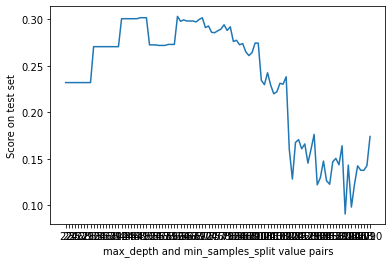

Max Depth: 6
Min Samples Split: 2
Test Score: 0.301005348274921
MSE: 0.5516758082389056


In [ ]:
#First Approach on finding the best "max_depth" , "min_samples_split"

mdepths = [2, 3, 4, 5, 6, 7, 8, 10, 12, 15, 20]
min_samples = [2, 3, 4, 5, 6, 7, 8, 9, 10]

#Creating list for min_samples, mdepths value pairs  
product_list = []

errors = np.zeros(99)
index=0

#Checking every pair with two for loop
for d in mdepths:
  for s in min_samples:
    tree_reg = DecisionTreeRegressor(max_depth=d, min_samples_split=s)
    tree_reg.fit(wine_train_df.drop('quality',axis=1),wine_train_df['quality'])
    u=tree_reg.score(wine_test_df.drop('quality',axis=1), wine_test_df['quality'])
    errors[index]=u
    index+=1
    product_list.append(str(d) + str(s))
    
pyplot.plot(product_list, errors)
pyplot.xlabel('max_depth and min_samples_split value pairs')
pyplot.ylabel('Score on test set')
pyplot.show()

#Maximum test score 
max(errors)

#Finding the index of max test score  
max_index = np.where(errors==max(errors))[0][0]

print("Max Depth: " + str(product_list[max_index][0]))
print("Min Samples Split: " + str(product_list[max_index][1]))


tree_reg = DecisionTreeRegressor(max_depth=int(product_list[max_index][0]), min_samples_split=int(product_list[max_index][1]))
tree_reg.fit(wine_train_df.drop('quality',axis=1),wine_train_df['quality'])

#Best test score and corresponding MSE value
print("Test Score: " + str(tree_reg.score(wine_test_df.drop('quality',axis=1), wine_test_df['quality'])))
print("MSE: " + str(mean_squared_error(tree_reg.predict(wine_test_df.drop('quality',axis=1)), wine_test_df['quality'])))